In [97]:
import netCDF4 as nc
import os
import glob
import matplotlib.pyplot as plt


from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf



ImportError: cannot import name 'kl_divergence' from 'tensorflow.keras.losses' (/home/carmen/Documents/SIFretrieval/sif_env/lib/python3.12/site-packages/keras/_tf_keras/keras/losses/__init__.py)

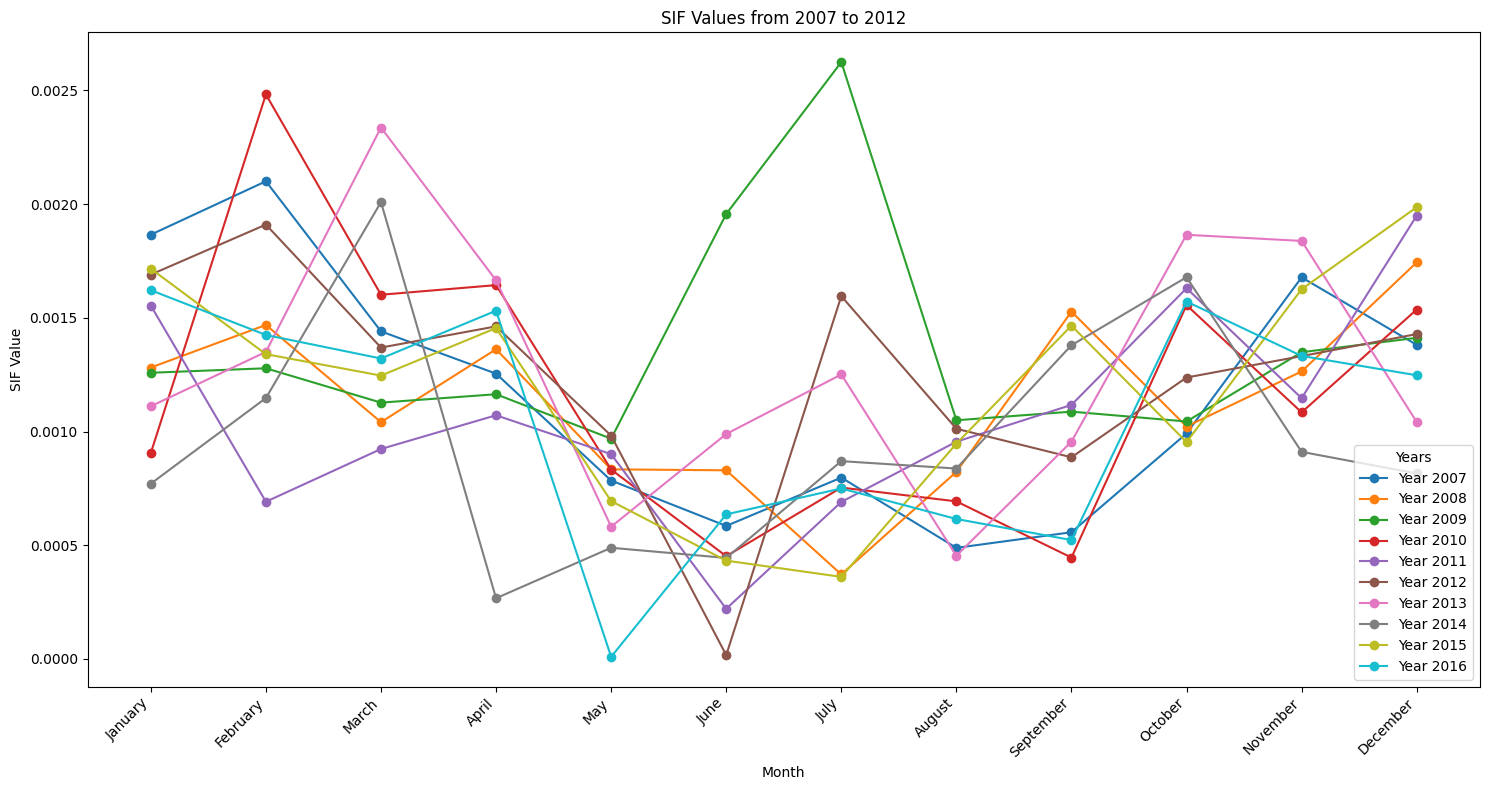

In [188]:
sif_values_by_year = {}


for year in range(2007, 2017):
    year_str = str(year)  
    year_sif_values = []
    months = []
    folder_path = f"./SIF_data/GOME2A_SIF{year_str}"
   
    nc_files = sorted(glob.glob(os.path.join(folder_path, f"GOME2A_SIF{year_str}_*.nc")))
  
    for file in nc_files:
        filename = os.path.basename(file) 
        
        month_number = filename.split("_")[2][:2] 
        
        month_name = {
            "01": "January", "02": "February", "03": "March",
            "04": "April", "05": "May", "06": "June",
            "07": "July", "08": "August", "09": "September",
            "10": "October", "11": "November", "12": "December"
        }.get(month_number, "Unknown")

        dataset = nc.Dataset(file)
        
        sif_value = dataset.variables["SIF"][150, 224]

        year_sif_values.append(sif_value)
        months.append(month_name)
    
    # Store the year-wise SIF data in the dictionary
    sif_values_by_year[year_str] = (months, year_sif_values)

# Plotting all years' data
plt.figure(figsize=(15, 8))

# Loop over the years to plot
for year, (months, sif_values) in sif_values_by_year.items():
    plt.plot(months, sif_values, label=f"Year {year}", marker='o')

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('SIF Value')
plt.title('SIF Values from 2007 to 2012')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.legend(title="Years")
plt.tight_layout()  # Adjust layout to fit labels

# Show plot
plt.show()


/home/carmen/Documents/SIFretrieval/sif_env/lib/python3.12/site-packages/numpy/_core/shape_base.py:63: UserWarning: Warning: converting a masked element to nan.
  result = asanyarray(arys[0])


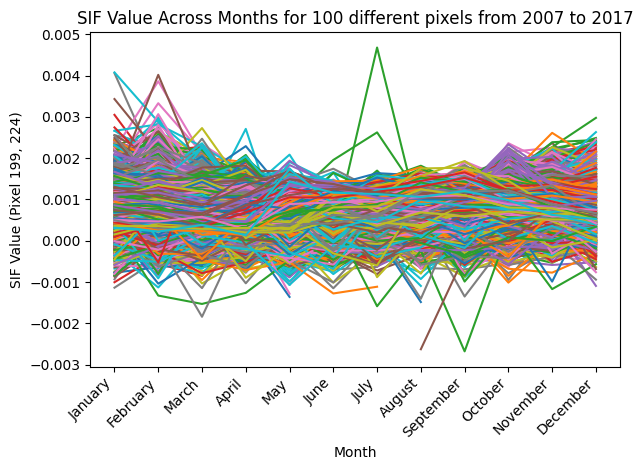

In [42]:
import os
import glob
#import h5py
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Create a dictionary to store SIF values by year and pixel
sif_pix = {}

# Loop through years 2007 to 2016
for year in range(2007, 2017):
    year_str = str(year)
    year_sif_values = []
    months = []
    folder_path = f"./SIF_data/GOME2A_SIF{year_str}"

    # Get all .nc files for the current year
    nc_files = sorted(glob.glob(os.path.join(folder_path, f"GOME2A_SIF{year_str}_*.nc")))

    for file in nc_files:
        filename = os.path.basename(file)  # Get filename

        # Extract the month from the filename
        month_number = filename.split("_")[2][:2]  # Get '01' from 'GOME2A_SIF2011_01.nc'
        
        # Convert month number to month name
        month_name = {
            "01": "January", "02": "February", "03": "March",
            "04": "April", "05": "May", "06": "June",
            "07": "July", "08": "August", "09": "September",
            "10": "October", "11": "November", "12": "December"
        }.get(month_number, "Unknown")

        # Open the NetCDF file
        dataset = nc.Dataset(file)

        # Extract the SIF values for all pixels (assuming it's a 2D grid of size (lat, lon))
        sif_values = dataset.variables["SIF"][:]  # Shape: (latitude, longitude)

        # Store the SIF values for the month
        year_sif_values.append(sif_values)  # Store the full grid for each month
        months.append(month_name)

    # Store the year-wise SIF data for all pixels in the dictionary
    sif_pix[year_str] = {
        "months": months,
        "sif_values": year_sif_values  # Each month will have an entire grid of SIF values
    }

# Now sif_values_by_year_and_pixel contains the SIF values for each year and each month.

# Example: To plot the SIF value for a specific pixel (say, pixel at [100, 150]):
for pixel_row in range(100, 200):
   # pixel_row, pixel_col = 100, 224
    
    # Plotting SIF for this pixel across all years
    #plt.figure(figsize=(10, 6))
    
    for year, data in sif_pix.items():
        months = data["months"]
        sif_values = [month_sif[pixel_row, pixel_col] for month_sif in data["sif_values"]]
        if any(sif_values)<0:
            print(sif_values)
        plt.plot(months, sif_values, label=f"Year {year}")

# Customizing the plot
plt.xlabel('Month')
plt.ylabel(f'SIF Value (Pixel {pixel_row}, {pixel_col})')
plt.title('SIF Value Across Months for 100 different pixels from 2007 to 2017')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
#plt.legend(title="Years")
plt.tight_layout()

# Show plot
plt.show()

In [56]:
sif_values_by_year = {}

# Define pixel range (example: selecting pixels in a small region)
row_start, row_end = 223, 225  # Example pixel range in row dimension
col_start, col_end = 100, 400  # Example pixel range in column dimension

for year in range(2007, 2017):
    year_str = str(year)
    months = []
    year_sif_values = []  # This will hold 12 months of pixel values (12, num_pixels)

    folder_path = f"./SIF_data/GOME2A_SIF{year_str}"
    nc_files = sorted(glob.glob(os.path.join(folder_path, f"GOME2A_SIF{year_str}_*.nc")))

    for file in nc_files:
        filename = os.path.basename(file)
        month_number = filename.split("_")[2][:2]

        dataset = nc.Dataset(file)

        # Extract SIF values for all selected pixels
        sif_values = dataset.variables["SIF"][row_start:row_end, col_start:col_end]
        
        # Flatten to store as (num_pixels,)
        sif_values = sif_values.flatten()

        # Store the month and SIF values
        year_sif_values.append(sif_values)
        months.append(month_number)

    # Convert list to numpy array with shape (12, num_pixels)
    year_sif_values = np.array(year_sif_values)  

    # Store in dictionary
    sif_values_by_year[year_str] = (months, year_sif_values)

# Convert to numpy array of shape (10,12,num_pixels)
all_sif_values = np.array([sif_values_by_year[str(year)][1] for year in range(2007, 2017)])

sif_tensor = torch.tensor(all_sif_values)

print("Final SIF Data Shape:", sif_tensor.shape)  # Expected shape: (10, 12, num_pixels)

Final SIF Data Shape: torch.Size([10, 12, 600])


In [101]:
from torch.utils.data import TensorDataset, DataLoader, random_split

train_size = int(0.8 * sif_tensor.shape[2])  
test_size = sif_tensor.shape[2] - train_size  

train_tensor = sif_tensor[:, :, :train_size] 
test_tensor = sif_tensor[:, :, train_size:] 

train_loader = DataLoader(train_tensor, batch_size=2, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=2, shuffle=False)



train_set = train_tensor.reshape(10, -1).numpy()

test_set = test_tensor.reshape(10, -1).numpy()

#print("Train Tensor Shape:", train_set.shape)  
print("Test Tensor Shape:", test_set.shape)  

Test Tensor Shape: (10, 1440)


In [78]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)


In [79]:
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [102]:
original_dim = train_set.shape[1]
input_shape = (original_dim,)
intermediate_dim = int(original_dim / 2)
latent_dim = int(original_dim / 4)

In [87]:
# encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
# use the reparameterization trick and get the output from the sample() function
z = Lambda(sample, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(inputs, z, name='encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 5760)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2880)      │ 16,591,680 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 1440)      │  4,148,640 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 1440)      │  4,148,640 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 1440)      │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,888,960 (94.94 MB)

 Trainable params: 24,888,960 (94.94 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='relu')(x)
# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)         │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2880)           │     4,150,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5760)           │    16,594,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,744,640 (79.13 MB)

 Trainable params: 20,744,640 (79.13 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# full VAE model
utputs = decoder(encoder(inputs))
vae_model = Model(inputs, outputs, name='vae_mlp')


In [93]:
# the KL loss function:
def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all 
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    #total_loss = reconstruction_loss + kl_loss
    return total_loss

In [96]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0001, clipvalue=0.5)
#opt = optimizers.RMSprop(learning_rate=0.0001)

vae_model.compile(optimizer=opt, loss=vae_loss)
vae_model.summary()
# Finally, we train the model:
results = vae_model.fit(train_set, train_set,
                        shuffle=True,
                        epochs=32,
                        batch_size=256)

Model: "vae_mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 1440)           │    24,888,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 5760)           │    20,744,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,633,600 (174.08 MB)

 Trainable params: 45,633,600 (174.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.